# SHAP explenations for white wine quality dataset

## About the dataset

Wine quality dataset, available at: https://archive.ics.uci.edu/ml/datasets/wine+quality connects a quality score of wine (1-10) with 11 continous attributes of its physiochemical properties:
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol

It contains data on both: red and white wine. I assume that quality predictors would be different for either, so I've arbitraily decided to focus on the white wine.

## Used regressors

The prediction of wine quality can be interpreted as both: classification and regression task. I chose to treat it as the latter.

As a main regressor I chose **Random Forest Regressor** implemented in the scikit learn package.

As a regressor used for the sake of comparision I chose **SVR** implemented as well in the scikit learn package

## Exemplary local model decompositions

### Selected instances

I've selected three instances to make local model decompositions:
1. A strong wine (one of the strongest alcohol percentage in the test set)
> * alcohol = 14.000 (+3.505)
> * sulphates = 0.830 (+0.344)
> * pH = 3.210 (+0.025)
> * density = 0.987 (-0.007)
> * total sulfur dioxide = 106.000 (-32.214)
> * free sulfur dioxide = 33.000 (-2.423)
> * chlorides = 0.036 (-0.009)
> * residual sugar = 1.900 (-4.670)
> * citric acid = 0.180 (-0.158)
> * volatile acidity = 0.455 (+0.177)
> * fixed acidity = 4.700 (-2.159)

2. A sweet wine (the highest value of residual sugar in the test set)
> * alcohol = 11.700 (+1.205)
> * sulphates = 0.690 (+0.204)
> * pH = 3.390 (+0.21)
> * density = 1.039 (+0.045)
> * total sulfur dioxide = 160.000 (+21.786)
> * free sulfur dioxide = 8.000 (-27.423)
> * chlorides = 0.074 (+0.029)
> * residual sugar = 65.800 (+59.230)
> * citric acid = 0.600 (+0,262)
> * volatile acidity = 0.965 (+0.687)
> * fixed_acidity = 7.800 (+0.941)

3. The best wine (one of the highest quality score in the test dataset)
> * alcohol = 11.900 (+1.405)
> * sulphates = 0.400 (-0.086)
> * pH = 3.250 (+0.065)
> * density = 0.990 (-0.003)
> * total sulfur dioxide = 177.000 (+38.786)
> * free sulfur dioxide = 30.000 (-5.423)
> * chlorides = 0.034 (-0.011)
> * residual sugar = 2.100 (-4.470)
> * citric acid = 0.360 (+0.022)
> * volatile acidity = 0.250 (-0.028)
> * fixed acidity = 7.300 (+0.441)

The values in the parenthasis are the difference between the local attributes values and the mean values of the attributes in the test dataset.


### Predictions

A strong wine got predicted quality score of 6.92, with the true score of 7

A sweet wine got predicted quality score of 5.14, with the true score of 6

The best wine got predicted quality score of 7.82, with the true score of 8

### Model decompositions

#### Strong Wine

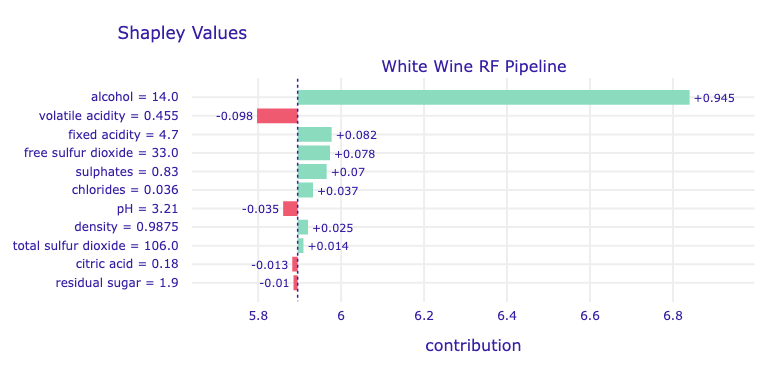

The high alcohol score in the strong wine had an overwhelmingly high impact on the quality score. 

#### Sweet Wine

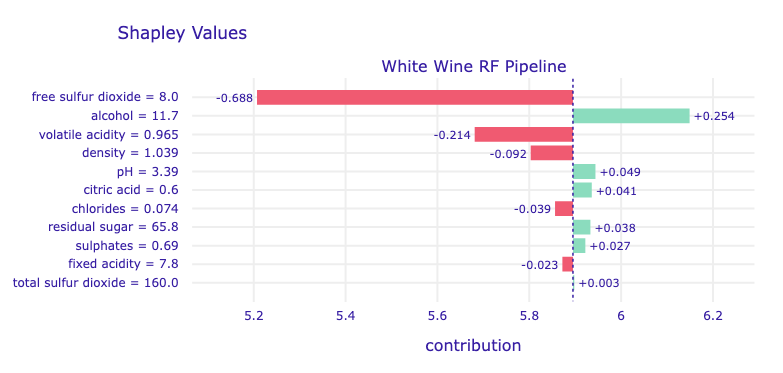

As could be seen above, the low value of free sulfur dioxide and volatile acidity greatly impacted the score in a negative way. Both of those parameters where lower than average in the sweet wine. However higher than average alcohol percantage positively impacted the final score.
Based on this explenation it could be assumed, that high quality wines have higher then average value of free sulfur dioxidy, alcohol and volatile acidity.
The selection basis of this instance, residual sugar, had close to none impact on the final score.

The wine ended up with the quality score below average

#### Best wine

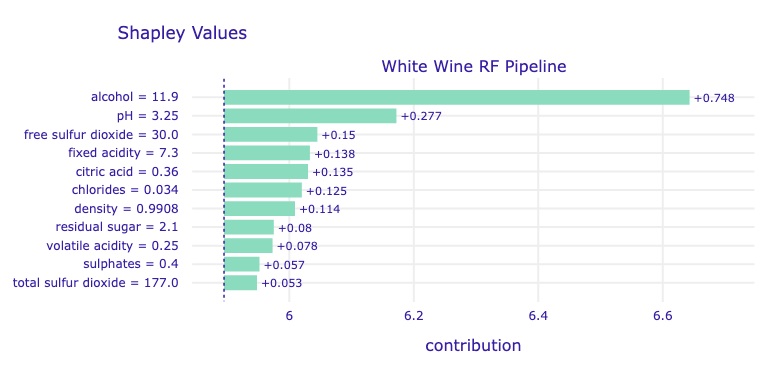

The best wine has all of the variables positively impacting its score, with the largest contributor being alcohol. While this is not suprising, suprising is fact, that the second largest contributor is pH, that was a minor contributor in two previous wines. While volatile acidity was an important factor in strong and sweet wine quality score attribution, in the best wine it is less impactful than a residual sugar (which was suprisingly unimpactful for sweet wine).

Worth pointing out is also fact, that the same value of variable can impact prediction of instances differently. Here, a wine with the same value of pH as the best wine is negatively impacted by it. It is because the  shapley values show influence over the final score with pre-selected set of variables. Thus, the provided values cannot be used to predict any other situation.

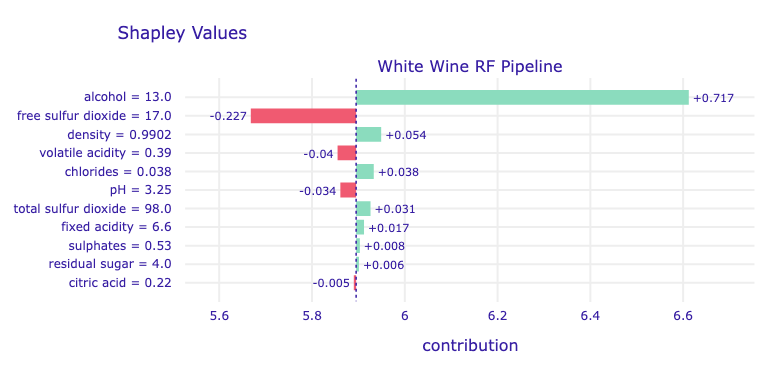

*The clickable versions of model decomposition plots are available in the appendix*

#### Conclusions

While all of the three wines quality score was highly impacted by the alcohol, the vastly different order of other attributes proves, that SHAP, a tool for local explanations, cannot (at least by working on only a small number of local explanations) be used to provide global explanations.

## Inter model comparisions

Having trained both models I have decided to compare their pipelines for predictions. They have different values of mean squared errors (with random forrest performing better), however in this particular case (sweet wine, as introduced in the section above) the SVR model got a score closer to the actual one
> RF score: 5.14
>
> SVR score: 5.68
>
> True score: 6

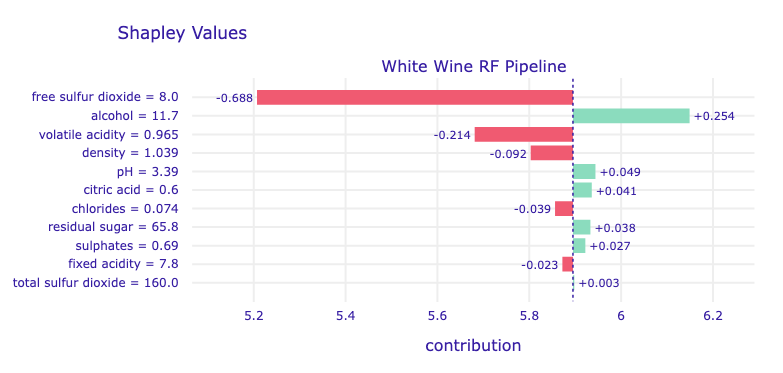

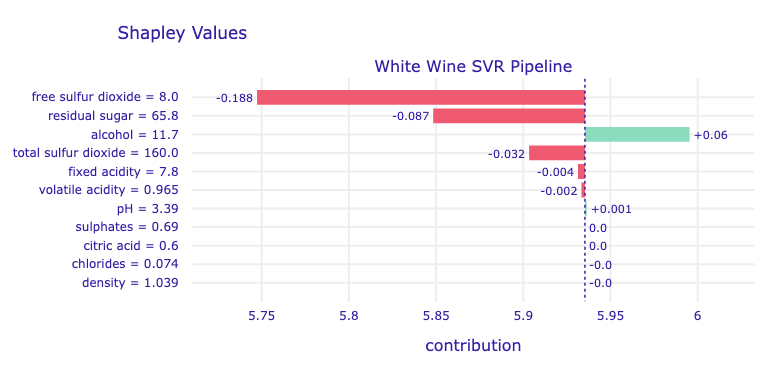

While the most influential parameter in both cases is free sulfur dioxide, the order of other parameters is shuffled (with alcohol staying close to the top).

In the SVR classifier expected influence of residual sugar over prediction can be clearly seen.

The disregard for residual sugar could be a downside of the RF model, since its score is worse for this case.

It is worth noting, that repeated explanation from the same model on the same instance would probably result in different values for parameters contribution, since the expactation is based on an avarege score of 25 variables orders.

Having said that, expected difference between iterations of explenations should be smaller than the one observed between models.

# Appendix

## Packages

In [1]:
!pip install dalex

     |████████████████████████████████| 1.0 MB 26.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for dalex: filename=dalex-1.4.1-py3-none-any.whl size=1042860 sha256=170a9f08960f3ade820eae39fe8be90c6c981c420adcf7f4d12a66221e968951
  Stored in directory: /root/.cache/pip/wheels/8c/8e/1b/95d59374d386e8e495aed6cbab4c4b6d72be73993a424c5e12
Successfully built dalex
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [371]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
import dalex as dx

## Preparing the data

In [97]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2022-03-23 18:33:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv.1’

winequality-white.c 100%[===================>] 258.23K   930KB/s    in 0.3s    

2022-03-23 18:33:39 (930 KB/s) - ‘winequality-white.csv.1’ saved [264426/264426]



In [98]:
X = pd.read_csv('/content/winequality-white.csv', sep=';')
Y = pd.DataFrame(X.iloc[:,-1])
X = X.iloc[:,:-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(dtop=True)

In [372]:
x_train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2475,7.4,0.56,0.09,1.5,0.071,19.0,117.0,0.99496,3.22,0.53,9.8
3207,6.8,0.21,0.42,1.2,0.045,24.0,126.0,0.99234,3.09,0.87,10.9
779,8.1,0.17,0.44,14.1,0.053,43.0,145.0,1.00060,3.28,0.75,8.8
853,7.7,0.34,0.58,11.1,0.039,41.0,151.0,0.99780,3.06,0.49,8.6
890,5.0,0.31,0.00,6.4,0.046,43.0,166.0,0.99400,3.30,0.63,9.9


## Training and evaluating Random Forest Regressor

In [374]:
wwine_rf = RandomForestRegressor(max_depth=32)
wwine_rf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=32)

In [375]:
rf_preds = wwine_rf.predict(x_test)

In [376]:
mean_squared_error(y_test, preds)

0.43207556122448976

## Training and evaluating SVR

In [336]:
wwine_svr = SVR()

In [342]:
wwine_svr.fit(x_train, y_train['quality'].values)

SVR()

In [366]:
svr_preds = wwine_svr.predict(x_test)

In [370]:
mean_squared_error(y_test['quality'].values, svr_preds)

0.7166017725502308

## Selecting instances for local model decompositions (with predictions)

### Strong wine

In [379]:
x_test.sort_values('alcohol').tail(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
347,4.7,0.455,0.18,1.9,0.036,33.0,106.0,0.98746,3.21,0.83,14.0


In [380]:
strong_wine = x_test.iloc[347]

In [383]:
rf_preds[347]

6.92

In [385]:
y_test.iloc[347]

quality    7
Name: 3915, dtype: int64

### Sweet wine

In [382]:
x_test.sort_values('residual sugar').tail(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
190,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7


In [215]:
sweet_wine = x_test.iloc[190]

In [386]:
rf_preds[190]

5.14

In [388]:
svr_preds[190]

5.6843184879196755

In [390]:
y_test.iloc[190]

quality    6
Name: 2781, dtype: int64

### Best wine

In [261]:
np.where(y_test['quality'].values==max(y_test.values))

(array([   3,   25,   62,   64,   79,   93,  118,  139,  144,  182,  211,
         215,  242,  305,  331,  376,  404,  419,  465,  472,  513,  559,
         598,  605,  621,  634,  688,  882,  884,  885,  925,  966,  969,
        1013, 1015, 1136, 1161, 1172, 1190, 1231, 1234, 1235, 1333, 1438,
        1447, 1466, 1478, 1502, 1505, 1533, 1547, 1565, 1614, 1616, 1623,
        1630, 1657, 1698, 1731, 1736, 1741, 1753, 1763, 1870, 1878, 1882,
        1886, 1898, 1915, 1916, 1954]),)

In [272]:
best_wine = x_test.loc[1234]

In [387]:
rf_preds[1234]

7.82

In [391]:
y_test.iloc[1234]

quality    8
Name: 836, dtype: int64

## Explenations

### Explainers

#### RF

In [158]:
wwine_exp_rf = dx.Explainer(wwine_rf, x_train, y_train, label='White Wine RF Pipeline')

Preparation of a new explainer is initiated

  -> data              : 2938 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 2938 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : White Wine RF Pipeline
  -> predict function  : <function yhat_default at 0x7fad3eb70290> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 3.77, mean = 5.9, max = 8.46
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.46, mean = -0.00234, max = 1.44
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


#### SVR

In [392]:
wwine_exp_svr = dx.Explainer(wwine_svr, x_train, y_train, label='White Wine SVR Pipeline')

Preparation of a new explainer is initiated

  -> data              : 2938 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 2938 values
  -> model_class       : sklearn.svm._classes.SVR (default)
  -> label             : White Wine SVR Pipeline
  -> predict function  : <function yhat_default at 0x7fad3eb70290> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



  -> predicted values  : min = 4.68, mean = 5.94, max = 6.41
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -3.02, mean = -0.0426, max = 3.05
  -> model_info        : package sklearn

A new explainer has been created!


### Strong wine

In [242]:
bd_strong = wwine_exp_rf.predict_parts(strong_wine, type='shap')

In [243]:
bd_strong.plot(max_vars=11)

### Sweet wine

In [232]:
bd_sweet = wwine_exp.predict_parts(sweet_wine, type='shap')

In [234]:
bd_sweet.plot(max_vars=11)

In [365]:
bd_sweet_svr = wwine_exp_svr.predict_parts(sweet_wine, type='shap')

In [369]:
bd_sweet_svr.plot(max_vars=11)

### Best wine (and other)

In [273]:
bd_best = wwine_exp.predict_parts(best_wine, type='shap')

In [274]:
bd_best.plot(max_vars=11)

In [284]:
x_test.loc[x_test['pH']==3.25].head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
6,8.3,0.20,0.74,4.45,0.044,33.0,130.0,0.99240,3.25,0.42,12.2
35,6.9,0.33,0.26,5.00,0.027,46.0,143.0,0.99240,3.25,0.43,11.2
101,6.5,0.27,0.19,4.20,0.046,6.0,114.0,0.99550,3.25,0.35,8.6
113,6.5,0.14,0.33,7.60,0.050,53.0,189.0,0.99660,3.25,0.49,8.6
144,6.8,0.19,0.32,7.05,0.019,54.0,188.0,0.99350,3.25,0.37,11.1
230,5.9,0.42,0.36,2.40,0.034,19.0,77.0,0.99184,3.25,0.48,10.9
248,7.6,0.48,0.33,7.00,0.024,14.0,130.0,0.99180,3.25,0.45,12.5
258,5.6,0.23,0.29,3.10,0.023,19.0,89.0,0.99068,3.25,0.51,11.2
321,6.6,0.39,0.22,4.00,0.038,17.0,98.0,0.99018,3.25,0.53,13.0
337,7.2,0.21,0.36,15.70,0.045,68.0,183.0,0.99922,3.25,0.76,9.4


In [313]:
other_wine = x_test.iloc[321]

In [314]:
bd_other = wwine_exp.predict_parts(other_wine, type='shap')

In [315]:
bd_other.plot(max_vars=11)